In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from vega_datasets import data

# Part 1

### Call the sf_temps() dataset from the vega_datasets library like so:
data.sf_temps()

In [34]:
# getting data
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


### Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
# checking data types
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [35]:
# setting index to date
df = df.set_index('date')

In [5]:
# getting the average daily temperatures
df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


In [37]:
df.resample('D').temp.mean()

date
2010-01-01    49.170833
2010-01-02    49.304167
2010-01-03    49.391667
2010-01-04    49.445833
2010-01-05    49.491667
                ...    
2010-12-27    48.991667
2010-12-28    49.000000
2010-12-29    49.012500
2010-12-30    49.012500
2010-12-31    49.116667
Freq: D, Name: temp, Length: 365, dtype: float64

<AxesSubplot:xlabel='date'>

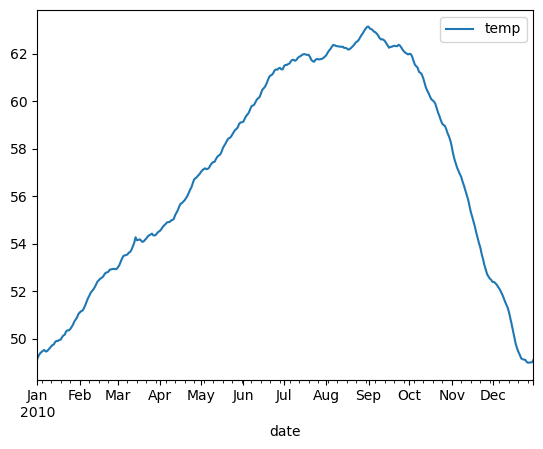

In [6]:
# getting the visuals for avg daily temp over time
df.resample('D').mean().plot()

<AxesSubplot:xlabel='date'>

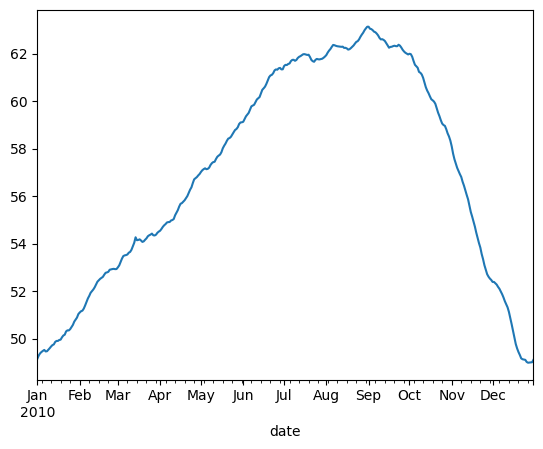

In [38]:
df.resample('D').temp.mean().plot()

### Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

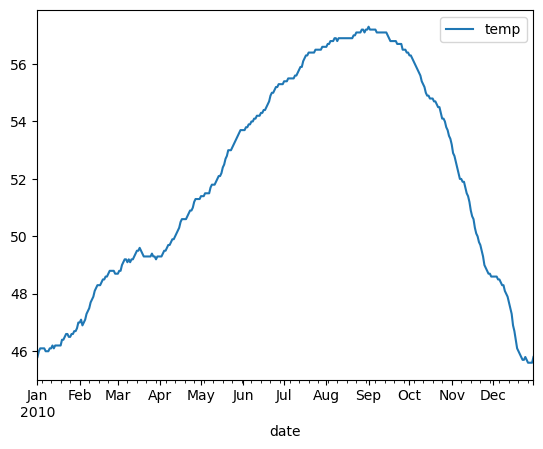

In [7]:
# getting the minimum temperature per day and plotting
df.resample('D').min().plot()

### Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

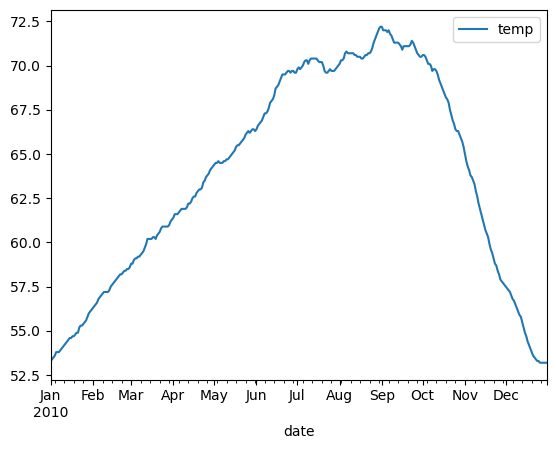

In [8]:
# resmapling by the day and getting the maximum temp for each day and visualising
df.resample('D').max().plot()

### Which month is the coldest, on average?

In [40]:
# sort the values
df.resample('M').mean().sort_values(by='temp')

,temp
date,
2010-01-31,49.984140
2010-12-31,50.498253
2010-02-28,52.243899
2010-03-31,53.956528
2010-11-30,55.185139
2010-04-30,55.633056
2010-05-31,57.970968
2010-10-31,60.253091
2010-06-30,60.444722


In [9]:
# january
df.resample('M').mean()[df.resample('M').mean() == df.resample('M').mean().min()]

,temp
date,
2010-01-31,49.98414
2010-02-28,NaN
2010-03-31,NaN
2010-04-30,NaN
2010-05-31,NaN
2010-06-30,NaN
2010-07-31,NaN
2010-08-31,NaN
2010-09-30,NaN


### Which month has the highest average temperature?

In [41]:
df.resample('M').mean().idxmax()

temp   2010-09-30
dtype: datetime64[ns]

In [10]:
# september has the higghest average temp
df.resample('M').mean()[df.resample('M').mean() == df.resample('M').mean().max()]

,temp
date,
2010-01-31,NaN
2010-02-28,NaN
2010-03-31,NaN
2010-04-30,NaN
2010-05-31,NaN
2010-06-30,NaN
2010-07-31,NaN
2010-08-31,NaN
2010-09-30,62.487083


### Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [42]:
# getting average min and max temp and creating a new df with this info
new_df = df.resample('D').agg(['min', 'max'])
new_df.columns

MultiIndex([('temp', 'min'),
            ('temp', 'max')],
           )

In [43]:
# creating new column with variability in it
new_df['variability'] = abs(new_df[('temp', 'min')] - new_df[('temp', 'max')])

In [49]:
# september
new_df.resample('M').variability.mean().idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

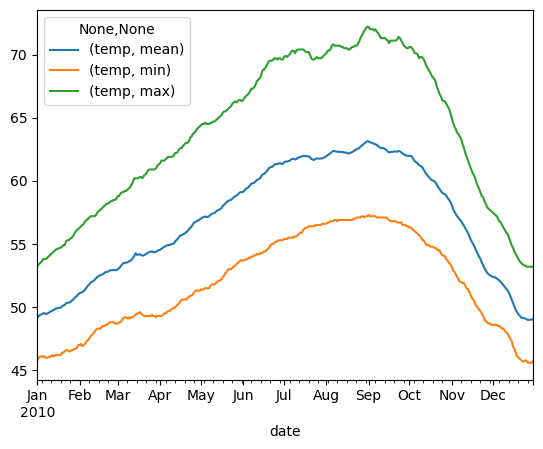

In [14]:
# reampling and creating a plot
df.resample('D').agg(['mean', 'min', 'max']).plot()

# Part 2

In [50]:
# geting data and inspecting
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [16]:
# checking dtypes
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

### Which year and month combination has the highest amount of precipitation?

In [17]:
# setting the year and mponth as separate columns
# df['year'], df['month'] = df.date.dt.year, df.date.dt.month

In [18]:
# checking
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [52]:
# resetting the index to the date
df = df.set_index('date')

In [53]:
# trying to resample by the month and seeing
by_month = df.resample('M').sum()

In [54]:
# December of 2015 had the highest precipitation
by_month[by_month['precipitation'] == by_month['precipitation'].max()]

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6


### Visualize the amount of monthly precipitation over time.

Text(0, 0.5, 'Precipitation (inches)')

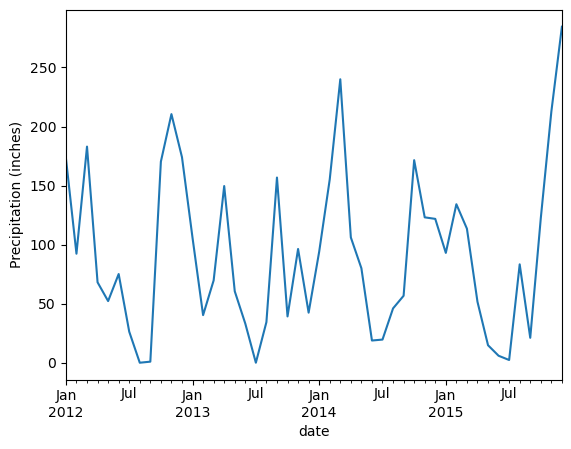

In [55]:
# getting plot of preciupitation
by_month['precipitation'].plot()
plt.ylabel('Precipitation (inches)')

### Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [23]:
# getting daily averages
by_day = df.resample('D').mean()

In [24]:
# CHECKING
by_day.head()

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-01,0.0,12.8,5.0,4.7
2012-01-02,10.9,10.6,2.8,4.5
2012-01-03,0.8,11.7,7.2,2.3
2012-01-04,20.3,12.2,5.6,4.7
2012-01-05,1.3,8.9,2.8,6.1


<AxesSubplot:xlabel='date'>

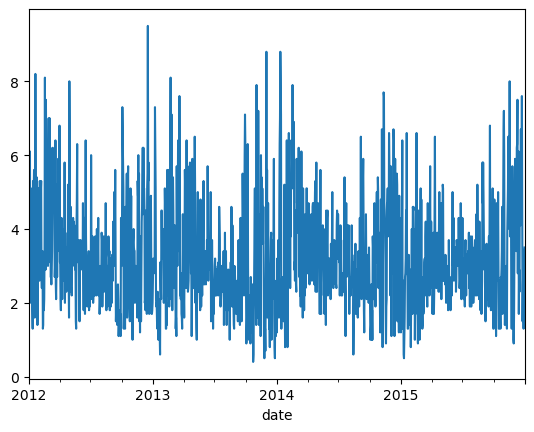

In [25]:
# plottin wind by day over time
by_day.wind.plot()

<AxesSubplot:xlabel='date'>

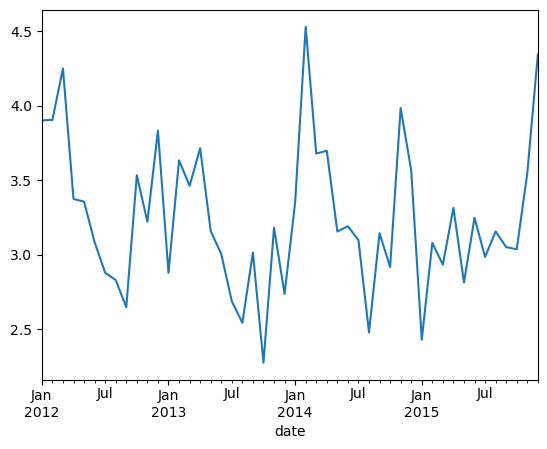

In [26]:
# that was too messy so I will use the by_month intead
by_month.wind.plot()

### Which year-month combination is the windiest?

In [56]:
# feb of 2-14 was the windiest
by_month[by_month.wind == by_month.wind.max()]

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6


### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [28]:
# cheacking the df
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [57]:
df.resample('Y').weather.value_counts()

date        weather
2012-12-31  rain       191
            sun        118
            drizzle     31
            snow        21
            fog          5
2013-12-31  sun        205
            fog         82
            rain        60
            drizzle     16
            snow         2
2014-12-31  sun        211
            fog        151
            rain         3
2015-12-31  sun        180
            fog        173
            drizzle      7
            rain         5
Name: weather, dtype: int64

In [29]:
# I need to separate by year then have pandas count the number of sunny days
# 2014 had the sunniest number of days
pd.concat([df, pd.get_dummies(df.weather)], axis=1).resample('Y').mean()

,precipitation,temp_max,temp_min,wind,drizzle,fog,rain,snow,sun
date,,,,,,,,,
2012-12-31,3.349727,15.276776,7.289617,3.400820,0.084699,0.013661,0.521858,0.057377,0.322404
2013-12-31,2.268493,16.058904,8.153973,3.015890,0.043836,0.224658,0.164384,0.005479,0.561644
2014-12-31,3.377534,16.995890,8.662466,3.387671,0.000000,0.413699,0.008219,0.000000,0.578082
2015-12-31,3.121096,17.427945,8.835616,3.159726,0.019178,0.473973,0.013699,0.000000,0.493151


### In which month does it rain the most?

In [58]:
# getting new df with encoded variables
new_df = pd.concat([df, pd.get_dummies(df.weather)], axis=1)

In [65]:
# ceraing a month columsn
new_df['month'] = new_df.index.month
new_df.index.strftime('%b')

Index(['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan',
       ...
       'Dec', 'Dec', 'Dec', 'Dec', 'Dec', 'Dec', 'Dec', 'Dec', 'Dec', 'Dec'],
      dtype='object', name='date', length=1461)

In [32]:
# feb has the most rain
new_df.groupby('month').mean().rain == new_df.groupby('month').mean().rain.max()

month
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
Name: rain, dtype: bool

### Which month has the most number of days with a non-zero amount of precipitation?

In [33]:
# new_df[]

SyntaxError: invalid syntax (2872371883.py, line 1)

In [ ]:
# december
new_df[new_df.precipitation > 0].groupby('month').count().max() == new_df[new_df.precipitation > 0].groupby('month').count()

In [66]:
new_df['did_rain'] = np.where(new_df['precipitation'] > 0, 1, 0)
new_df.head()

,precipitation,temp_max,temp_min,wind,weather,drizzle,fog,rain,snow,sun,month,did_rain
date,,,,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,0,0,0,0,1,0
2012-01-02,10.9,10.6,2.8,4.5,rain,0,0,1,0,0,1,1
2012-01-03,0.8,11.7,7.2,2.3,rain,0,0,1,0,0,1,1
2012-01-04,20.3,12.2,5.6,4.7,rain,0,0,1,0,0,1,1
2012-01-05,1.3,8.9,2.8,6.1,rain,0,0,1,0,0,1,1


# Part 3

In [ ]:
# getting data
df = data.flights_20k()

In [ ]:
# setting index to date
# df = df.set_index('date')

### Convert any negative delays to 0.

In [ ]:
# turning negatices to 0
df.delay[df['delay'] < 0] = 0
df

### Which hour of the day has the highest average delay?

In [ ]:
# setting the hour
df['hour'] = df.date.dt.hour

In [ ]:
# getting the highest avg delay per hour
df.groupby('hour').mean() == df.groupby('hour').mean().max()

# 3am

### Does the day of the week make a difference in the delay amount?

In [ ]:
# creating weekday names column
df['day_name'] = df.date.dt.day_name()

In [ ]:
# yes, may do a stats test to prove it
df.groupby('day_name').mean()

### Does the month make a difference in the delay amount?

In [ ]:
# creating month name column
df['month_name'] = df.date.dt.month_name()

In [ ]:
# yes
df.groupby('month_name').mean()

# Bonus

In [ ]:
# getting data
df = data.iowa_electricity()

In [ ]:
# inspecting
df.head()

### For each row, calculate the percentage of the year's total that energy source provided.

In [ ]:
# checking the year values
df.year.value_counts()

In [ ]:
# calculating the percentage, but in decimal form
df['perc_total_energy'] = df.net_generation / df.net_generation.sum()

In [ ]:
df.head()

### Lineplot of generation over time, color by source

In [ ]:
sns.lineplot(df['year'],df['net_generation'], hue=df.source)

### Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [ ]:
df.drop(columns='perc_total_energy').pivot_table(index='source', columns='year')

### Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

In [ ]:
# creating cumulative net generation column
# df.drop(columns='cumulative_generation', inplace=True)
df['cumulative_generation'] = df.groupby('source').transform(lambda x: x.cumsum()).net_generation

In [ ]:
df.sample(5)

In [ ]:
sns.lineplot(data=df, x='year',y='cumulative_generation', hue=df.source)

### Is the total generation increasing over time?

Yes

### How would you control for increasing consumption over time when considering how much energy is coming from each source?
express each number as a % of the year's total

In [ ]:
# create multiple graphs based on the years consumption

# Bonus 2

### Use the sf_temps dataset

In [ ]:
df = data.sf_temps()

In [ ]:
df.head()

### Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

In [ ]:
# checking mins and maxes of the data
df.temp.describe()

In [ ]:
# creating categories
df['temp_cat'] = pd.cut(df['temp'], bins=[45, 52, 56, 60, 73], labels = ['cold', 'cool', 'warm', 'hot'])

### How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

In [ ]:
# getting visual of this representation
pd.crosstab(index=df['temp_cat'], columns=df.date.dt.month)

In [ ]:
# creating new columns for month number
df['month'] = df.date.dt.month
# df['month_name'] = df.

In [ ]:
# creating a graph with the colors
sns.lineplot(data=df, x='month', y='temp', palette='vlag', hue='temp_cat')
plt.legend()
plt.ylabel('Months')
plt.xlabel('Temperature')
plt.title('Temperature Change Over Months')

### Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

In [ ]:
df['day'] = df.date.dt.day

In [ ]:
df = df.set_index('date')

In [ ]:
df['days_in_month'] = df.groupby('month').day.max()

In [ ]:
df = df.drop(columns=['days_in_month', 'days_in_moonth'])

In [ ]:
# im thinking there will be subplots that show each year and in each year there will be 4 bins for
# i'll try one first

In [ ]:
sns.barplot(data=df, x='month', y='day', palette='vlag', hue='temp_cat')